# Exploratory Data Analysis: Residential Energy Panel Data

This notebook performs a comprehensive exploratory data analysis (EDA) on the `residential_panel_data.csv` dataset. The goal is to understand energy consumption trends, the impact of climate (HDD/CDD), and economic factors.

## 1. Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Data Loading and Initial Inspection

In [2]:
df = pd.read_csv('./../data/integrated-data/residential_panel_data.csv')

display(df.head())

,Year,End_Use,Fuel_Technology,Energy_ktoe,Population,Households,Inhabitants per household,HDD,CDD,GDP,Expenditure
0,2000,Cooking,Electricity,2603.127898,82163475.0,38136234.0,2.154473,3636.65,1.15,3295140.008,1853218.384
1,2000,Cooking,Natural gas,75.099968,82163475.0,38136234.0,2.154473,3636.65,1.15,3295140.008,1853218.384
2,2000,Space cooling,Air conditioning,49.765895,82163475.0,38136234.0,2.154473,3636.65,1.15,3295140.008,1853218.384
3,2000,Space heating,Advanced electric heating,91.031836,82163475.0,38136234.0,2.154473,3636.65,1.15,3295140.008,1853218.384
4,2000,Space heating,Biomass,3840.225618,82163475.0,38136234.0,2.154473,3636.65,1.15,3295140.008,1853218.384


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       504 non-null    int64  
 1   End_Use                    504 non-null    object 
 2   Fuel_Technology            504 non-null    object 
 3   Energy_ktoe                504 non-null    float64
 4   Population                 504 non-null    float64
 5   Households                 504 non-null    float64
 6   Inhabitants per household  504 non-null    float64
 7   HDD                        504 non-null    float64
 8   CDD                        504 non-null    float64
 9   GDP                        504 non-null    float64
 10  Expenditure                504 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 43.4+ KB


In [4]:
display(df.describe())

,Year,Energy_ktoe,Population,Households,Inhabitants per household,HDD,CDD,GDP,Expenditure
count,504.000000,504.000000,5.040000e+02,5.040000e+02,504.000000,504.000000,504.000000,5.040000e+02,5.040000e+02
mean,2011.500000,2513.762849,8.214304e+07,4.006393e+07,2.051626,3266.981250,11.567083,3.752713e+06,2.007370e+06
std,6.929064,4567.201471,8.845700e+05,1.076182e+06,0.054198,259.978225,13.093182,3.236181e+05,1.182987e+05
min,2000.000000,0.000000,8.022206e+07,3.813623e+07,1.998000,2842.270000,0.510000,3.295140e+06,1.853218e+06
25%,2005.750000,130.558979,8.195233e+07,3.924559e+07,2.005452,3070.867500,3.375000,3.438871e+06,1.922181e+06
50%,2011.500000,591.502429,8.237645e+07,4.001610e+07,2.022500,3219.290000,7.390000,3.741126e+06,1.981491e+06
75%,2017.250000,2783.188174,8.260060e+07,4.110968e+07,2.101000,3443.157500,13.700000,4.044904e+06,2.098762e+06
max,2023.000000,21336.334740,8.323712e+07,4.155116e+07,2.154473,3815.500000,51.710000,4.256330e+06,2.233093e+06


In [5]:
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values[missing_values > 0])

Missing Values per Column:
Series([], dtype: int64)


## 3. Univariate Analysis

### 3.1 Distribution of Energy Consumption
Analyzing the distribution of the target variable `Energy_ktoe`.

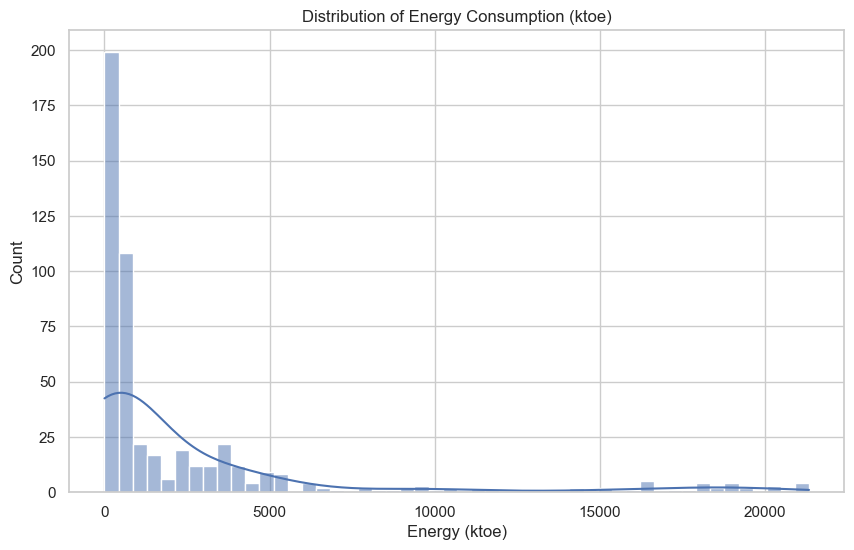

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Energy_ktoe'], bins=50, kde=True)
plt.title('Distribution of Energy Consumption (ktoe)')
plt.xlabel('Energy (ktoe)')
plt.show()

### 3.2 Categorical Feature Counts
Checking the frequency of different End Uses and Fuel Technologies.

C:\Users\Hiu\AppData\Local\Temp\ipykernel_15864\80716023.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='End_Use', data=df, order=df['End_Use'].value_counts().index, ax=axes[0], palette='viridis')
C:\Users\Hiu\AppData\Local\Temp\ipykernel_15864\80716023.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Fuel_Technology', data=df, order=df['Fuel_Technology'].value_counts().index, ax=axes[1], palette='magma')


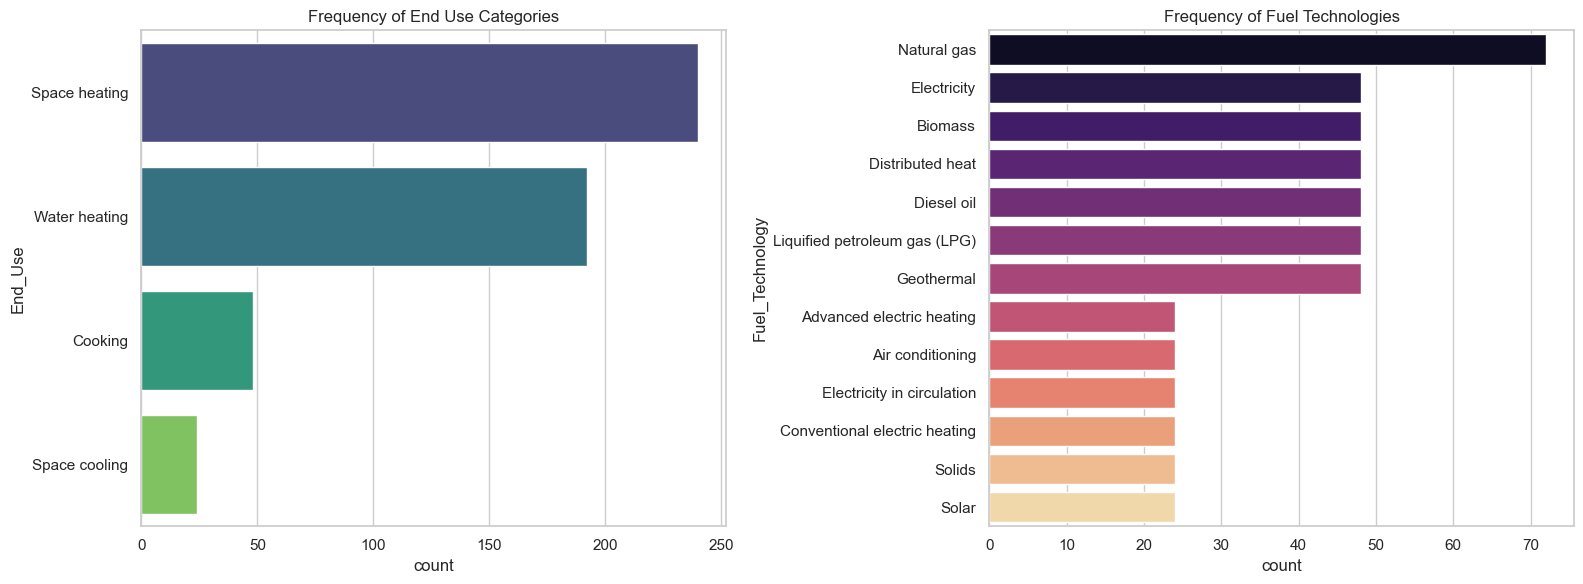

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(y='End_Use', data=df, order=df['End_Use'].value_counts().index, ax=axes[0], palette='viridis')
axes[0].set_title('Frequency of End Use Categories')

sns.countplot(y='Fuel_Technology', data=df, order=df['Fuel_Technology'].value_counts().index, ax=axes[1], palette='magma')
axes[1].set_title('Frequency of Fuel Technologies')

plt.tight_layout()
plt.show()

## 4. Temporal Analysis (Time Series)

### 4.1 Total Energy Consumption Over Years

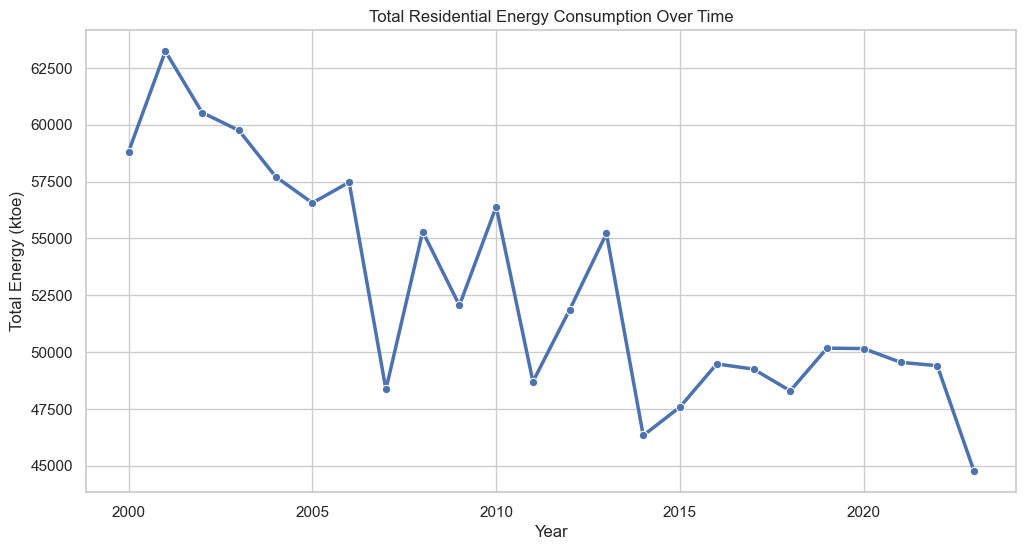

In [8]:
yearly_energy = df.groupby('Year')['Energy_ktoe'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_energy, x='Year', y='Energy_ktoe', marker='o', linewidth=2.5)
plt.title('Total Residential Energy Consumption Over Time')
plt.ylabel('Total Energy (ktoe)')
plt.grid(True)
plt.show()

### 4.2 Energy Consumption by End Use Over Time

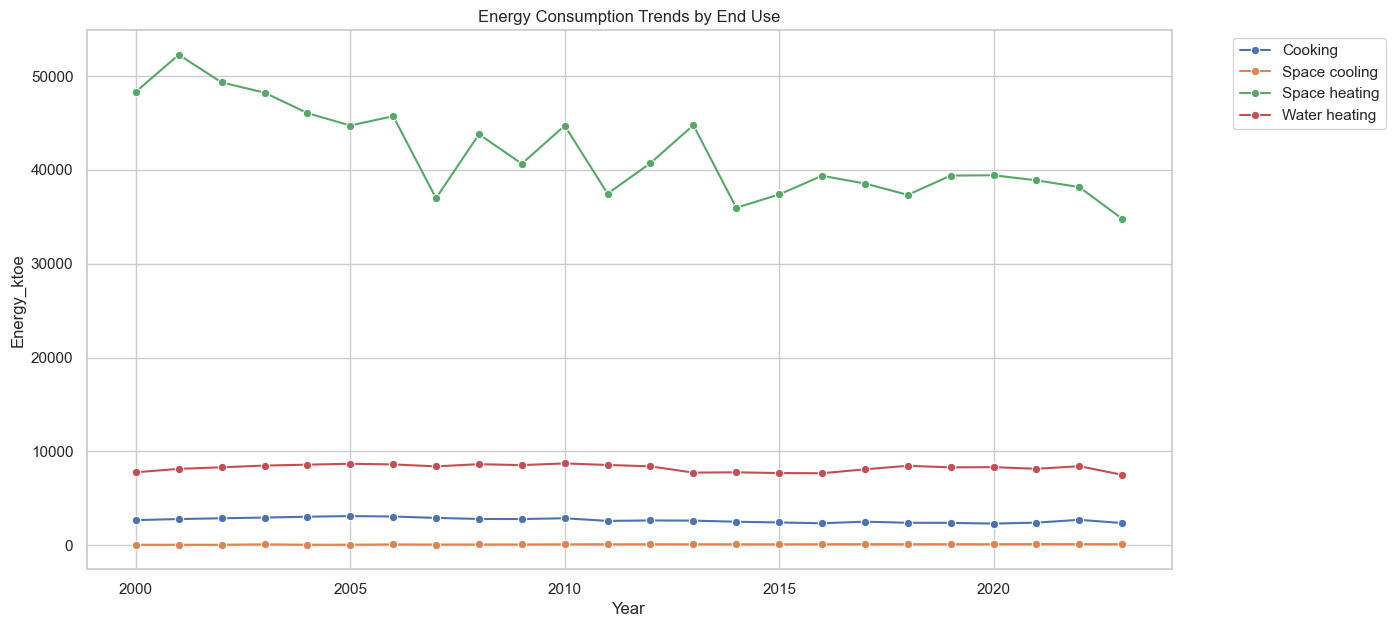

In [9]:
yearly_enduse = df.groupby(['Year', 'End_Use'])['Energy_ktoe'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_enduse, x='Year', y='Energy_ktoe', hue='End_Use', marker='o')
plt.title('Energy Consumption Trends by End Use')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 5. Multivariate Analysis

### 5.1 Energy by Fuel Technology

C:\Users\Hiu\AppData\Local\Temp\ipykernel_15864\3264805635.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fuel_energy, x='Energy_ktoe', y='Fuel_Technology', palette='rocket')


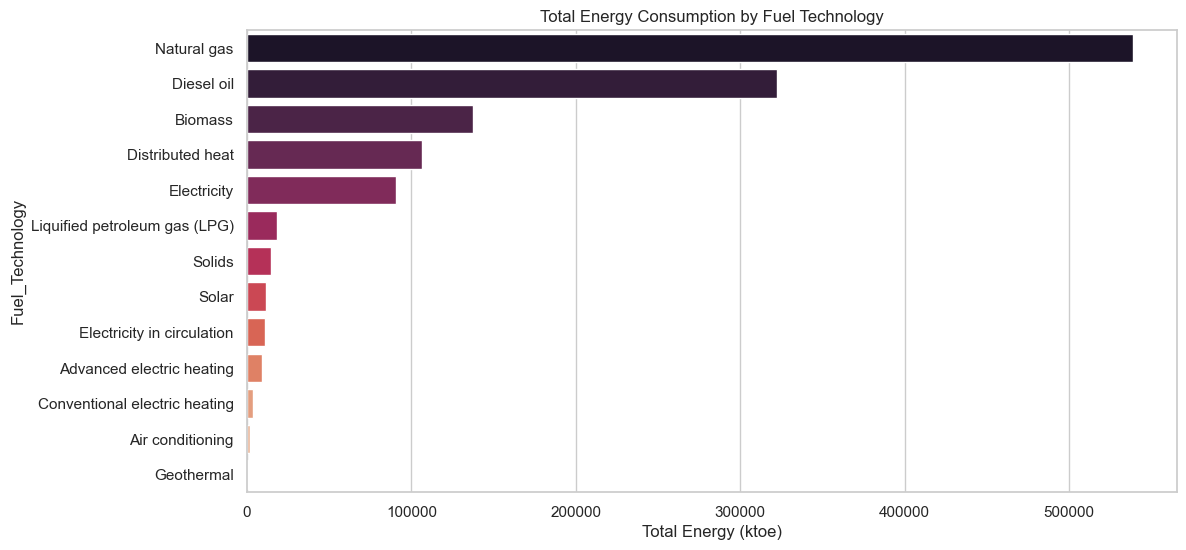

In [10]:
fuel_energy = df.groupby('Fuel_Technology')['Energy_ktoe'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=fuel_energy, x='Energy_ktoe', y='Fuel_Technology', palette='rocket')
plt.title('Total Energy Consumption by Fuel Technology')
plt.xlabel('Total Energy (ktoe)')
plt.show()

### 5.2 Correlation Heatmap
Investigating correlations between numerical variables (Energy, Demographics, Climate, Economics).

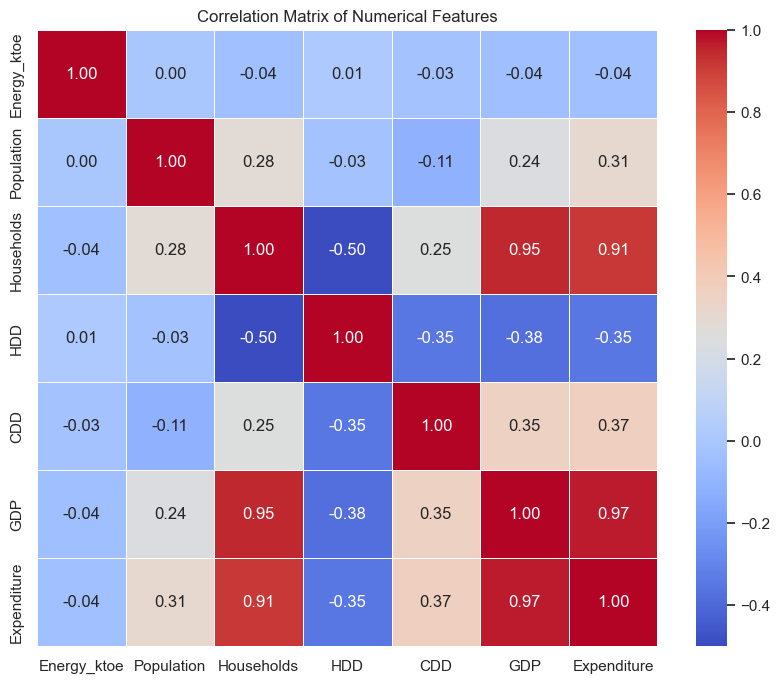

In [11]:
cols_to_corr = ['Energy_ktoe', 'Population', 'Households', 
                'HDD', 'CDD', 'GDP', 'Expenditure']

corr_matrix = df[cols_to_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### 5.3 Climate Impact: HDD vs Space Heating
Heating Degree Days (HDD) should logically correlate strongly with Space Heating energy consumption.

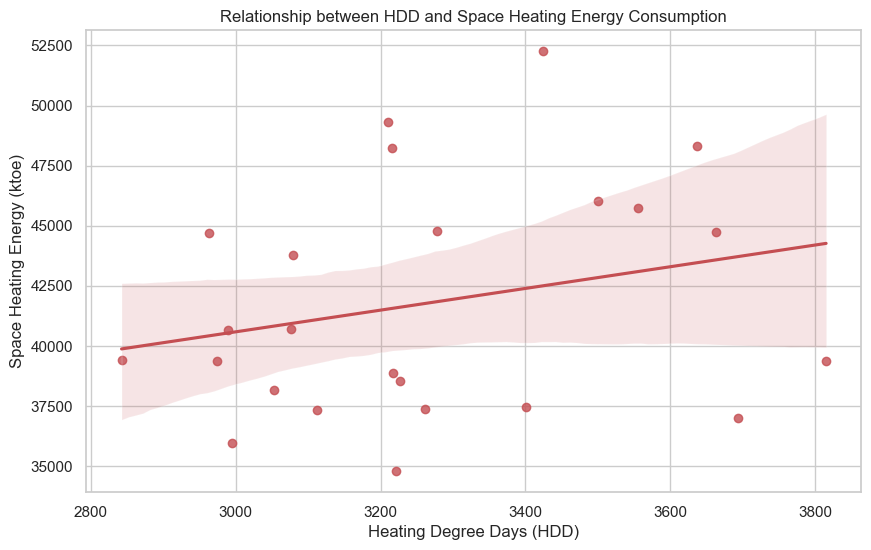

In [12]:
space_heating_df = df[df['End_Use'] == 'Space heating']

yearly_heating = space_heating_df.groupby('Year')[['Energy_ktoe', 'HDD']].mean() # Taking mean HDD as it is likely constant per year per region, sum Energy

yearly_heating_agg = space_heating_df.groupby('Year').agg({'Energy_ktoe': 'sum', 'HDD': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
sns.regplot(data=yearly_heating_agg, x='HDD', y='Energy_ktoe', color='r')
plt.title('Relationship between HDD and Space Heating Energy Consumption')
plt.xlabel('Heating Degree Days (HDD)')
plt.ylabel('Space Heating Energy (ktoe)')
plt.show()

### 5.4 Economic Impact: GDP vs Total Energy
Does higher GDP correlate with higher energy usage?

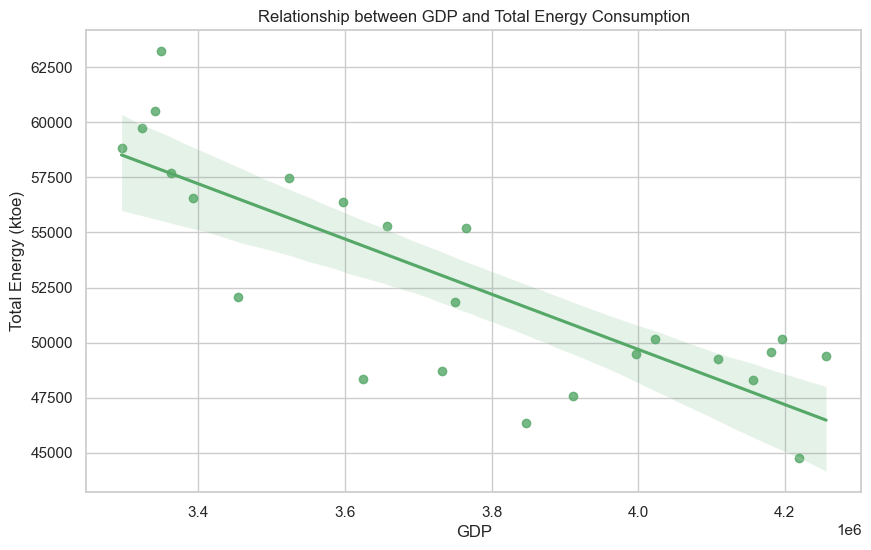

In [13]:
yearly_eco = df.groupby('Year').agg({'Energy_ktoe': 'sum', 'GDP': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
sns.regplot(data=yearly_eco, x='GDP', y='Energy_ktoe', color='g')
plt.title('Relationship between GDP and Total Energy Consumption')
plt.xlabel('GDP')
plt.ylabel('Total Energy (ktoe)')
plt.show()

## 6. Summary of Findings

TODO